# Plot history

In this file, we are going to plot the results of our simulation.

We will perform the following actions:
* Plot the real values of the PDE function
* Plot the estimated PDE values generated using Monte Carlo simulation

Please run the following codes:

## Table of Content

- [1 - Packages](#1)
- [2 - Plotting the results of our simulation](#2)
    - [2.1 - Load the relevant csv files](#2-1)
    - [2.2 - Plot the PDE in one dimension: fix x in {2, 3, ..., 10} and varies t within [0, x-1]](#2-2)

<a name='1'></a>
## 1 - Packages

Run the cell below to import all the libraries you'll need:

In [1]:
# From system
import os
import shutil
from pathlib import Path
import random

# Data structure
import numpy as np
import pandas as pd
import json
import csv

# Plotting graph
from matplotlib import pyplot as plt

<a name='2'></a>
## 2 - Plotting the results of our simulation

<a name='2-1'></a>
### 2.1 - Load the relevant csv files

In [2]:
np_dictionary = {}

dir_name = "results"
os_listdir = os.listdir(dir_name)
for file_name in os_listdir:
    file_path = os.path.join(dir_name, file_name)
    data =  pd.read_csv(file_path, delimiter=',', dtype=None, header=None)
    np_dictionary[file_name[:-4]] = data

<a name='2-3'></a>
### 2.2 - Plot the PDE in one dimension: fix z=(4,4,4) and varies t within [0, 4]

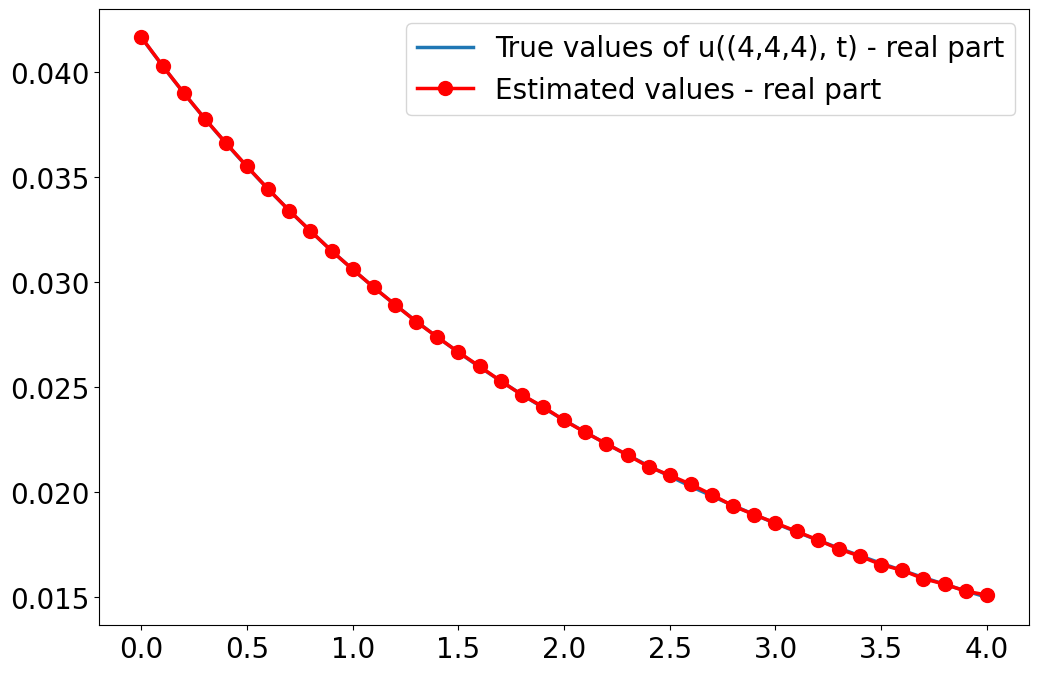

In [3]:
impose_ylim = False
y_lim = [0.1,0.2]

true_values_real = np.asarray(np_dictionary["analytic"])[0,:]
true_values_real = np.reshape(true_values_real, (1001,))[0:401]
t_values = np.arange(0, 4.01, 0.01)
estimated_values_real = np.asarray(np_dictionary["monte_carlo"])[0,:]
estimated_values_real = np.reshape(estimated_values_real, (41,))[0:41]
t_estimated = np.arange(0, 4.1, 0.1)

plt.figure(figsize=(12, 8))
plt.plot(t_values, true_values_real, label='True values of u((4,4,4), t) - real part', lw=2.5)
plt.plot(t_estimated, estimated_values_real, 'ro-', label='Estimated values - real part', lw=2.5, ms=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.ylabel('true vs estimated values - real part')
if impose_ylim:
    plt.ylim(y_lim)
# plt.xlabel('t values')
# plt.axvline(x=0.32,color='red')

# plt.title('True vs estimated values of u((4,4,4), t) - real part')
plt.legend(loc='upper right',fontsize=20)
plt.show()